# Employee Attrition Prediction

#### Add import statement

In [5]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### load employee data

In [6]:
emp_data = pd.read_csv("..\data.csv", sep='\t')
emp_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


#### check the data type 

In [7]:
emp_data.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

#### check for null data

In [8]:
emp_data.isnull().any()
#No nulls present data is fairly clean
#No need to insert synthetic data for missing values

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

#### Process Data

In [9]:
#Checking basic health of data for outliers and other issues which can bring noise
emp_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
## EmployeeCount , StandardHours, Over18 and EmployeeNumber are irrelevant, hence dropping these
emp_data=emp_data.drop(["EmployeeCount","StandardHours","Over18",'EmployeeNumber'],axis=1)

In [11]:
## Encode binary categorical data 
emp_data["Gender"] = emp_data["Gender"].astype('category')
emp_data["OverTime"] = emp_data["OverTime"].astype('category')
emp_data["Attrition"] = emp_data["Attrition"].astype('category')

emp_data["Gender"] = emp_data["Gender"].cat.codes
emp_data["OverTime"] = emp_data["OverTime"].cat.codes
emp_data["Attrition"] = emp_data["Attrition"].cat.codes


#### Plotting Data

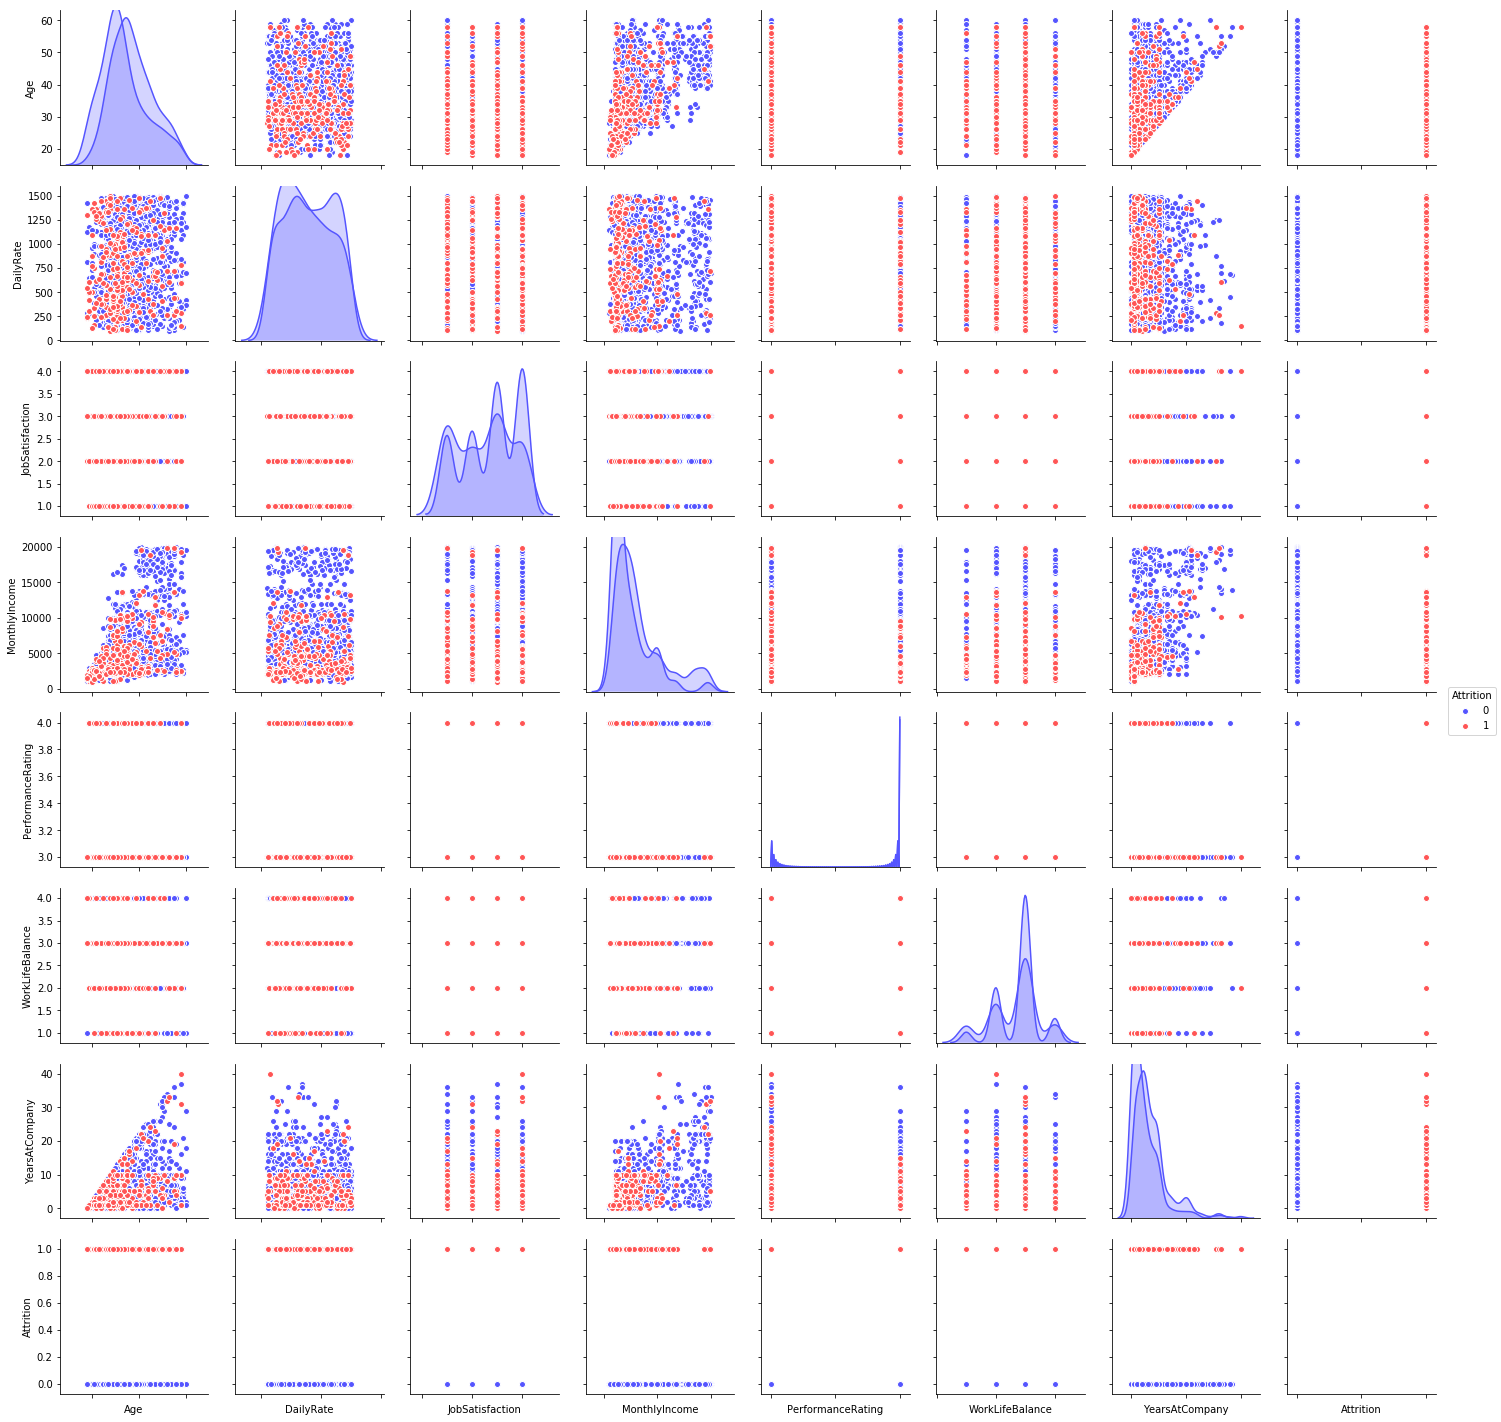

In [12]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition']


g = sns.pairplot(emp_data[numerical], hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

In [13]:
## list down all the features and categorize them
emp_data = pd.get_dummies(emp_data, columns=["MaritalStatus","EducationField"])
emp_data = pd.get_dummies(emp_data, columns=["Department","JobRole"])
personal_features = ['Age','DistanceFromHome','Education','EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','Gender','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single','NumCompaniesWorked']
money_features = ['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','StockOptionLevel']
satisfication_features = ['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']

emp_data = pd.get_dummies(emp_data, columns=["BusinessTravel"])
perks_info_features = ['BusinessTravel_Travel_Rarely','BusinessTravel_Travel_Frequently','BusinessTravel_Non-Travel','JobInvolvement','OverTime','PerformanceRating']

job_role_features = ['JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative']
department_features = ['Department_Human Resources','Department_Research & Development','Department_Sales']
employee_work_features = ['JobLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
emp_imp_features = job_role_features + department_features + employee_work_features + perks_info_features


In [14]:
## Normalize data (Feature Scaling) #TO bring data in a specific range
#Improves performance and accuracy
emp_data["MonthlyRateLog"] = np.log1p(emp_data["MonthlyRate"])
emp_data["MonthlyIncomeLog"] = np.log1p(emp_data["MonthlyIncome"])
emp_data["HourlyRateLog"] = np.log1p(emp_data["HourlyRate"])
emp_data["DailyRateLog"] = np.log1p(emp_data["DailyRate"])

money_log_features = ['DailyRateLog','HourlyRateLog','MonthlyIncomeLog','MonthlyRateLog','PercentSalaryHike','StockOptionLevel']

all_featues = personal_features + money_log_features + satisfication_features + emp_imp_features + perks_info_features
#TODO: find best features using
#rfc.feature_importances_
best_features = ['MonthlyIncome','Age','DailyRate','OverTime','MonthlyRate','TotalWorkingYears','HourlyRate','YearsAtCompany','YearsWithCurrManager','PercentSalaryHike','NumCompaniesWorked','DistanceFromHome','JobLevel','EnvironmentSatisfaction','RelationshipSatisfaction','JobInvolvement','YearsInCurrentRole','WorkLifeBalance','StockOptionLevel']




#### Define model train and model performance function

In [15]:
def train_model(model,features,dataset):
    # extract features from the dataset
    X_train = dataset[features]
    Y_train = dataset['Attrition']
    
    # spilt the data for training and testing
    X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.2)
    # train the model
    model.fit(X_tr, Y_tr)   
    Y_pr = model.predict(X_te)
    accuracy = model.score(X_te,Y_te)
    print("Model accuracy score is ",accuracy)
    return Y_te,Y_pr


def measure_perform_matrix(Y_pr,Y_te):
    confMat = confusion_matrix(Y_pr,Y_te)
    TP=confMat[0][0]
    FP=confMat[0][1]
    FN=confMat[1][0]
    TN=confMat[1][1]

    print("True Positive :",TP)
    print("False Positive :",FP)
    print("False Negative :",FN)
    print("True Negative :",TN)
    
    Acc = (TP + TN)/(TP+FP+FN+TN)
    print(Acc)
    
    Sensitivity = TP/(TP + FN) 
    Specificity = TN/(TN + FP) 

    print("Sensitivity :",Sensitivity)
    print("Specificity :",Specificity)
    
    Precision = TP/(TP+FP)
    invRecall = 1/Sensitivity
    invPrecision = 1/Precision
    F1_Score = 2/(invRecall + invPrecision)
    print("Precision : ",Precision)
    print("F1 Score",F1_Score)   
    
    
    ##Computing false and true positive rates
    fpr, tpr,_=roc_curve(Y_pr,Y_te,drop_intermediate=False)
    plt.figure()
    #plot the ROC curve
    plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
    #Adding Random FPR and TPR
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    #Title and label
    plt.xlabel('False Positive Rate')
    plt.ylabel('Total Positive Rate')
    plt.title('ROC curve')
    plt.show()

#Train model 
def train_model_grad(model,features,dataset,val):
    # extract features from the dataset
    X_train = dataset[features]
    Y_train = dataset['Attrition']
    
    # spilt the data for training and testing
    X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.2,random_state=val)
    # train the model
    model.fit(X_tr, Y_tr)   
    Y_pr = model.predict(X_te)
    accuracy = model.score(X_te,Y_te) 
    print("Model accuracy score is ",accuracy)
    return Y_te,Y_pr

#### Logistic Regression

Model accuracy score is  0.925170068027
True Positive : 253
False Positive : 8
False Negative : 14
True Negative : 19
0.925170068027
Sensitivity : 0.947565543071
Specificity : 0.703703703704
Precision :  0.969348659004
F1 Score 0.958333333333


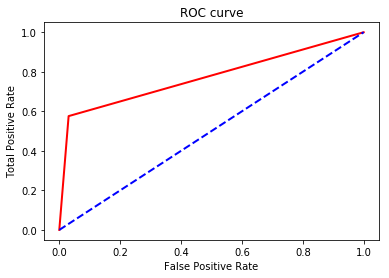

In [16]:
lReg = LogisticRegression()
Y_test, Y_predict= train_model_grad(lReg,all_featues,emp_data,26)
measure_perform_matrix(Y_test, Y_predict)

#### Random Forest Model 

Model accuracy score is  0.91156462585
True Positive : 259
False Positive : 2
False Negative : 24
True Negative : 9
0.91156462585
Sensitivity : 0.91519434629
Specificity : 0.818181818182
Precision :  0.992337164751
F1 Score 0.952205882353


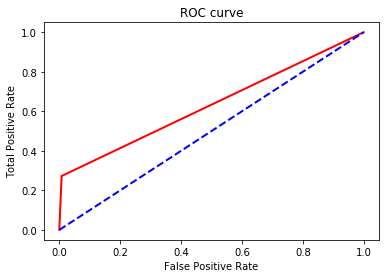

In [17]:
forest=RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=10,n_jobs=-1)
Y_test, Y_predict = train_model_grad(forest,all_featues,emp_data,26)
measure_perform_matrix(Y_test, Y_predict)

#### Neural Network

Model accuracy score is  0.931972789116
True Positive : 253
False Positive : 12
False Negative : 8
True Negative : 21
0.931972789116
Sensitivity : 0.969348659004
Specificity : 0.636363636364
Precision :  0.954716981132
F1 Score 0.961977186312


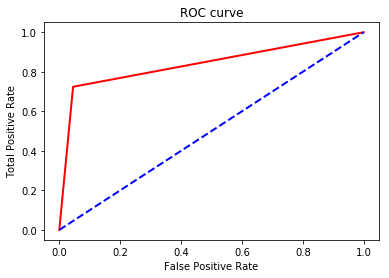

In [18]:
#TO DO:Bring Scaled Features as input 
neuNet = MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(256,), max_iter=500,random_state=26)
#y_te,y_pr = train_model(neuNet,all_featues,emp_data)
y_te, y_pr = train_model_grad(neuNet,all_featues,emp_data,26)
measure_perform_matrix(y_pr,y_te)

#### Gradient boosting classifier

Model accuracy score is  0.921768707483
True Positive : 259
False Positive : 21
False Negative : 2
True Negative : 12
0.921768707483
Sensitivity : 0.992337164751
Specificity : 0.363636363636
Precision :  0.925
F1 Score 0.957486136784


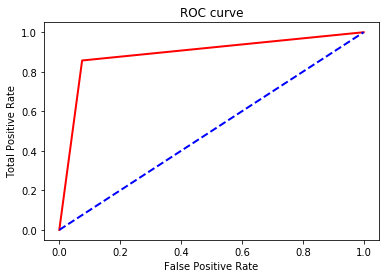

In [19]:
gradBoost = GradientBoostingClassifier(n_estimators=45)
y_te,y_pr = train_model_grad(gradBoost,all_featues,emp_data,26)
measure_perform_matrix(y_pr,y_te)


#### KNeighbors Classifier

Model accuracy score is  0.901360544218
True Positive : 258
False Positive : 26
False Negative : 3
True Negative : 7
0.901360544218
Sensitivity : 0.988505747126
Specificity : 0.212121212121
Precision :  0.908450704225
F1 Score 0.946788990826


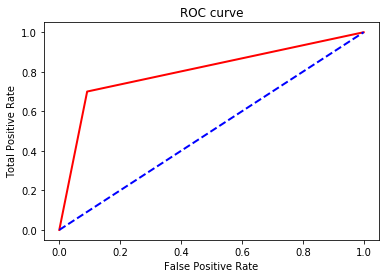

In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
y_te,y_pr = train_model_grad(knn,all_featues,emp_data,26)
measure_perform_matrix(y_pr,y_te)

### Hyperparameter Tuning

In [21]:
from sklearn.grid_search import GridSearchCV
#parameters range
params_range=[100,250,500,1000]
params_depth=[2,3,5]
param_grid={'n_estimators':params_range,
           'criterion':['entropy','gini'],
           'max_depth':params_depth}
gridsearch=GridSearchCV(estimator=forest,
                       param_grid=param_grid,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=1)

##
X_train = emp_data[all_featues]
Y_train = emp_data['Attrition']
    
# spilt the data for training and testing
X_tr, X_te, y_tr, y_te = train_test_split(X_train, Y_train, test_size=0.2)
##
gridsearch.fit(X_tr,y_tr)
print(gridsearch.best_score_)
print(gridsearch.best_params_)

#running on the test set
clf=gridsearch.best_estimator_
clf.fit(X_tr,y_tr)
print('Test accuracy : %.3f' %clf.score(X_te,y_te))

svm=gridsearch.best_estimator_
svm.fit(X_tr,y_tr)
print('Test accuracy: %.3f' %svm.score(X_te,y_te))


0.8503401360544217
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 250}
Test accuracy : 0.857
Test accuracy: 0.854


In [22]:
#seeing how model performs for diff values of neighbors
#searching for optimal value of K in KNN
X_train = emp_data[all_featues]
Y_train = emp_data['Attrition']
k_range= range(1,51)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)



[0.78102982770301754, 0.83132028450032358, 0.81157784846630254, 0.83474494203457028, 0.8361424466121139, 0.83677650252992719, 0.83951150619448067, 0.84087198744733005, 0.84088130624334134, 0.84088130624334134, 0.84496300186124063, 0.84223719106302275, 0.84358854241437398, 0.84358394598120623, 0.84154300372499979, 0.84222327583384327, 0.84357922361836246, 0.84153374789382607, 0.84221402000266965, 0.83879874422927259, 0.84016854427813337, 0.8387756361337575, 0.83878948839809908, 0.83945597120743898, 0.83946522703861248, 0.84082583422113755, 0.83878955136293709, 0.84218637843882471, 0.8414968504988074, 0.83877103970058964, 0.84082117482313179, 0.83945597120743898, 0.84014083974945031, 0.84014090271428832, 0.84014090271428832, 0.84014090271428832, 0.84014090271428832, 0.83946063060544474, 0.83946063060544474, 0.83946063060544474, 0.83946063060544474, 0.83946063060544474, 0.83946063060544474, 0.83878495492976912, 0.83946063060544474, 0.83878495492976912, 0.83878495492976912, 0.8387849549297

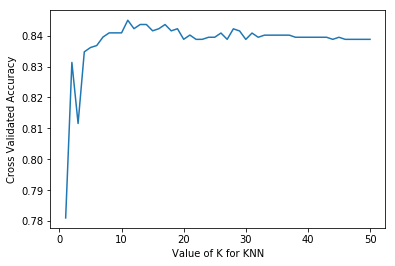

In [23]:
#Plotting k_range vs k_scores
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

# Summary

## Steps followed to create above models:
* **Data Wrangling** : Data was fairly clean with not specific outliers and missing values.
* **Feature engineering**: Selecting features which help us maximize accuracy. As part of this activity we have:    
> * Dropped some parameters as they were not not relevant and were bringing noise for eg EmployeeCount,StandardHours etc
> * Also we scaled some of the features which had high range (this improved model accuracy and performance)
* **Choosing a model** : We researched about different types of models to select the best one suitable for our problem.
* **Training** : We trained the models which were selected as part of the above exercise. We found *Neural Network* performed the best.
* **Evaluation** : Created custom function to evaluate different performance parameters of a given model for better evaluation
* **Hyperparameter tuning** : On the selected model, we tuned the hyperparameters to get best performance metrics such as ROC curve and accuracy out of the given models
* **Prediction**: The model with the best metrics was selected.


## Model Persistence

In [24]:
import pickle
def load_model(filename,X_test,Y_test):
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_test, Y_test)
    print('Model accuracy is ',result)

In [25]:
#Save model to disk
def save_model(model):
    filename = 'SavedModel.sav'
    pickle.dump(model, open(filename, 'wb'))

In [26]:
save_model(neuNet)

In [27]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.2, random_state=26)
filename = 'SavedModel.sav'
X_tr.head()
load_model(filename,X_te,Y_te)

Model accuracy is  0.931972789116
